<a href="https://colab.research.google.com/github/helioguerrini/Opensees_Analise_Estrutural_em_Python/blob/main/Treli%C3%A7a_2D_Opensees_basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install openseespy


In [3]:
# Carrega os módulos necessários
from openseespy.opensees import *
import math
import numpy as np
import matplotlib.pyplot as plt

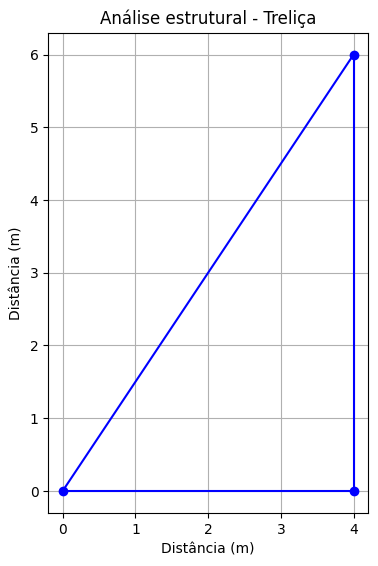

In [4]:
############## Criação e visualização de geometria #############
################### Tabela de coordenadas nodais ###############
#                                           nó 1    nó 2        nó n
#Tabela de coordenadas nodais = np.array([[x1,y1],[x2,y2],...,[xn,yn]])
nohs = np.array([[0.,0.],[4.,0.],[4.,6.]])

### Matriz de conectividade - Conexão das Barras da Treliça ###
barras = np.array([[1,3],[2,3],[1,2]])

# Visualização do modelo da treliça
fig = plt.figure()
axes = fig.add_axes([0.05,0.05,1,1])
fig.gca().set_aspect('equal', adjustable='box')

#Plot barras
for brr in barras:
    nohs_i = brr[0] #Node number for node i of this member
    nohs_j = brr[1] #Node number for node j of this member

    ix = nohs[nohs_i-1,0] #x-coord of node i of this member
    iy = nohs[nohs_i-1,1] #y-coord of node i of this member
    jx = nohs[nohs_j-1,0] #x-coord of node j of this member
    jy = nohs[nohs_j-1,1] #y-coord of node j of this member

    axes.plot([ix,jx],[iy,jy],'b') #Member

#Plot nohs
for n in nohs:
    axes.plot([n[0]],[n[1]],'bo')

axes.set_xlabel('Distância (m)')
axes.set_ylabel('Distância (m)')
axes.set_title('Análise estrutural - Treliça')
axes.grid()
plt.show()


In [5]:
# Limpa o modelo anterior
wipe()

In [6]:
# Definindo o modelo
model('basic', '-ndm', 2, '-ndf', 2)  # Modelo 2D com 2 graus de liberdade por nó

In [7]:
# Inserção das coordenadas nodais no modelo
for i in range(len(nohs)):
    node(i+1, nohs[i,0], nohs[i,1])

In [8]:
# Definindo propriedades do material (E, área)
E = 200e9  # Módulo de elasticidade (Pa)
A = 2.3e-3  # Área da seção transversal (m²)

In [9]:
uniaxialMaterial('Elastic', 1, E)  # Material elástico

In [10]:
# Inserção da conectividade entre as barras no modelo
for idx, barNo in enumerate(barras):
  # Elementos da treliça ('Truss', Barra, nó_i, nó_f, seção A, material)
  element('Truss', idx+1, int(barNo[0]), int(barNo[1]), A, 1)  # Barra 1

In [11]:
# Restrições (nó: tag, ux, uy)
fix(1, 1, 1)  # Nó 1 fixo em x e y
fix(2, 0, 1)  # Nó 2 fixo em y

In [12]:
# Aplicando cargas
timeSeries('Linear', 1)
pattern('Plain', 1, 1)
load(3, 12000.0, 0.0)  # Carga de 12 kN no nó 3 (direção x)
#load(2, 12000.0, 0.0)

In [13]:
# Configurações do analisador
system('BandSPD')  # Solução direta
numberer('Plain')  # Reordenação para eficiência
constraints('Plain')  # Condições de contorno simples
integrator('LoadControl', 1.0)  # Controle de carga estática
algorithm('Linear')  # Linear
analysis('Static')  # Análise estática

In [14]:
# Executando a análise
analyze(1)

0

In [15]:
# Resultados
print("\nDeslocamentos dos Nós:")
for i in range(1, len(nohs)+1):
    print(f"Nó {i}: {nodeDisp(i)}")  # Deslocamentos nos nós

print("\nForças axiais nas barras:")
for i in range(1, len(barras)+1):
    x1, y1 = nodeCoord(int(barras[i-1][0]))
    x2, y2 = nodeCoord(int(barras[i-1][1]))
    theta = math.atan2(y2 - y1, x2 - x1)
    forces = eleResponse(i, 'force')
    Faxial = (math.cos(theta))*forces[2] + (math.sin(theta))*forces[3]
    print(f"Barra {i}: Força axial = {Faxial} N, Tensão normal = {(Faxial/A)*10**-6} MPa")
    #print(f"Barra {i}: f1x = {forces[0]} N, f1y = {forces[1]} N, f2x = {forces[2]} N, f2y = {forces[3]} N")


Deslocamentos dos Nós:
Nó 1: [0.0, 0.0]
Nó 2: [0.0, 0.0]
Nó 3: [0.0009635499988830239, -0.0002347826086956521]

Forças axiais nas barras:
Barra 1: Força axial = 21633.30765278393 N, Tensão normal = 9.405785935993011 MPa
Barra 2: Força axial = -17999.999999999996 N, Tensão normal = -7.8260869565217375 MPa
Barra 3: Força axial = 0.0 N, Tensão normal = 0.0 MPa
